In [1]:
import sys
import os


SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from simon_device import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'lines.linewidth':3})
sns.set_style('white')

ACT-R connection has been started.


In [2]:
# Boksem post-error slowing data
df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7), 
                                'response_time':(457, 463, 460, 464, 473, 485, 463), 
                                'post-correct':(437, 443, 436, 443, 450, 460, 440), 
                                'post-error':(463, 464, 457, 452, 453, 457, 449)}).melt(id_vars=('interval'), var_name='pre_trial_accuracy', value_name='response_time')

/tmp/ipykernel_2845/4270179329.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_bokesem_post = pd.DataFrame({'interval':(1,2,3,4,5,6,7),


In [3]:
param_set={'valid_cue_percentage':0.8, 'n_trials':20, 'seed':'none'}
df_model, df_param= run_simulation(log='post_effect_', n_simulation=1, n_session=7, param_set=param_set)

...WRONG PATH...
Epoch #000
	Session #000
######### SETUP MODEL simon-motivation-model3 #########
>> ACT-R:  {'seed': 'none', 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motivation': 1, 'init_cost': 0.05, 'update_cost': False, 'valid_cue_percentage': 0.8, 'n_trials': 20} <<
--------------------------------------------------------------------------------
CONGRUENT-VALID (N=32): Accuracy = 1.00, Response Times = 539.19 ms
CONGRUENT-INVALID (N=6): Accuracy = 0.83, Response Times = 655.33 ms
INCONGRUENT-VALID (N=32): Accuracy = 0.97, Response Times = 607.75 ms
INCONGRUENT-INVALID (N=6): Accuracy = 0.83, Response Times = 723.33 ms
	Session #001
######### SETUP MODEL simon-motivation-model3 #########
>> ACT-R:  {'seed': 'none', 'ans': 0.5, 'le': 0.63, 'mas': 4.0, 'egs': 0.1, 'alpha': 0.4, 'imaginal-activation': 3.0, 'motivation': 1, 'init_cost': 0.05, 'update_cost': False, 'valid_cue_percentage': 0.8, 'n_trials': 20} <<
-------------------------

In [4]:
df_model['response_time'] = df_model['response_time'] * 1000

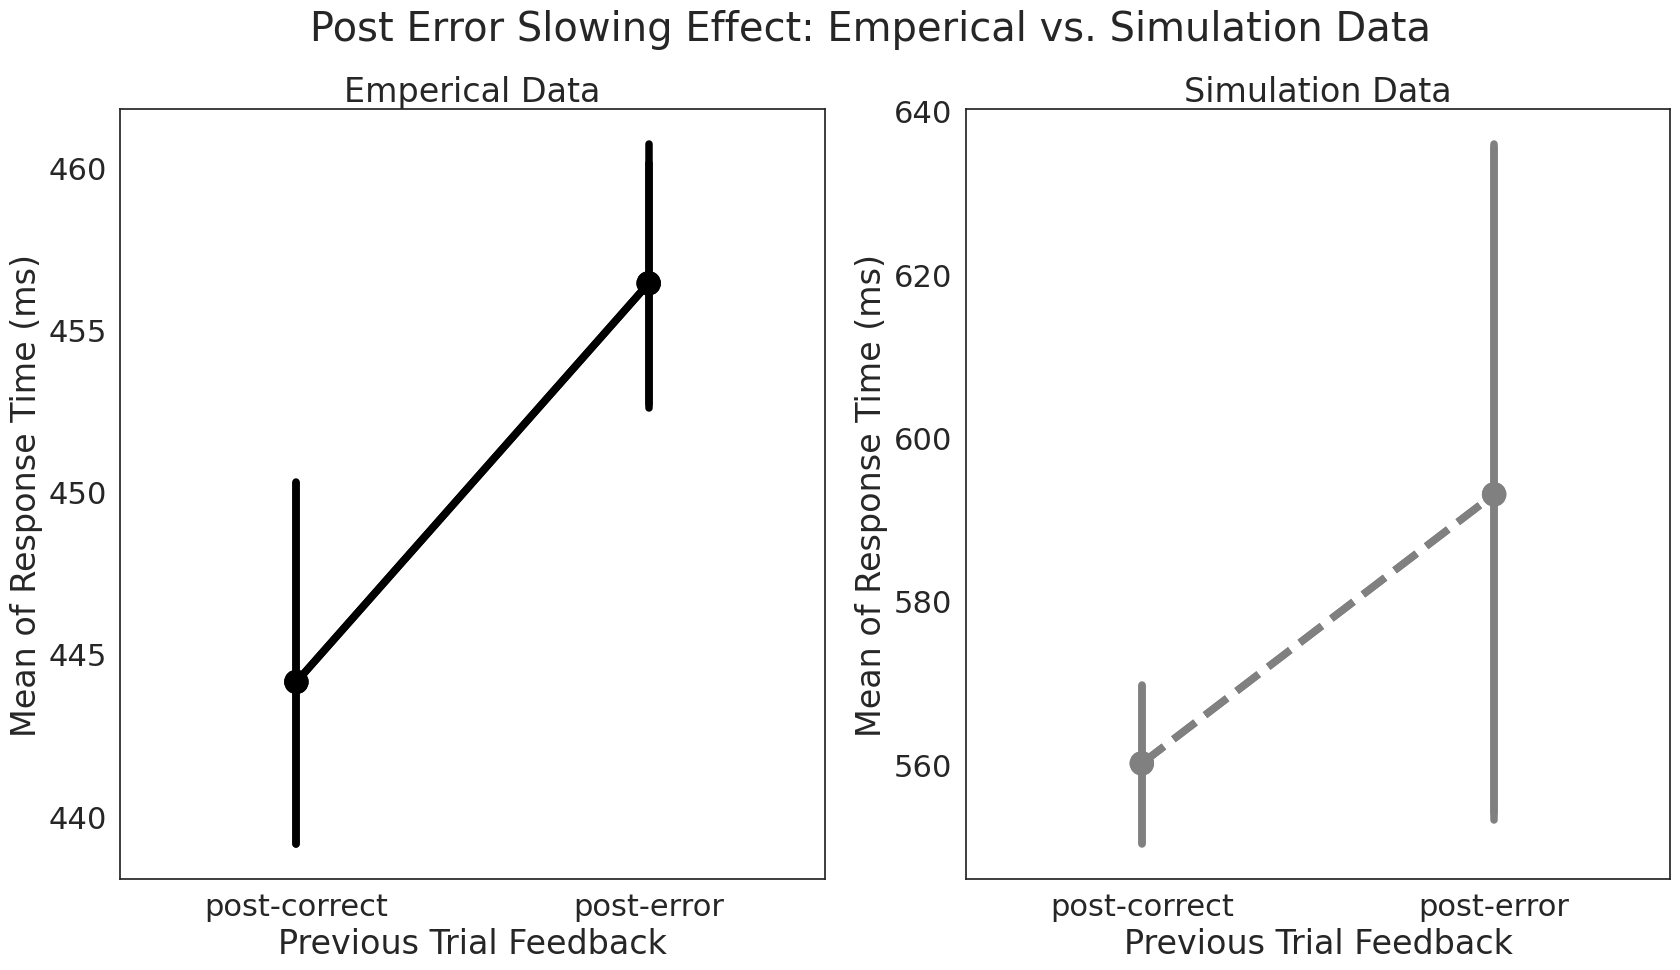

In [5]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Post Error Slowing Effect: Emperical vs. Simulation Data')
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True, ax=axes[0])
sns.pointplot(data=df_bokesem_post, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True, ax=axes[0])

sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', ax=axes[1])
sns.pointplot(data=df_model, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='gray', linestyles='--', ax=axes[1])

axes[0].set_title('Emperical Data')
axes[1].set_title('Simulation Data') 

for ax in axes:
    ax.set_xlabel('Previous Trial Feedback')
    ax.set_ylabel('Mean of Response Time (ms)')
plt.show()

In [6]:
orange_colors = sns.color_palette(palette='Oranges', n_colors=7, desat=None, as_cmap=False).as_hex()
blue_colors = sns.color_palette(palette='Blues', n_colors=7, desat=None, as_cmap=False).as_hex()

KeyError: 'interval'

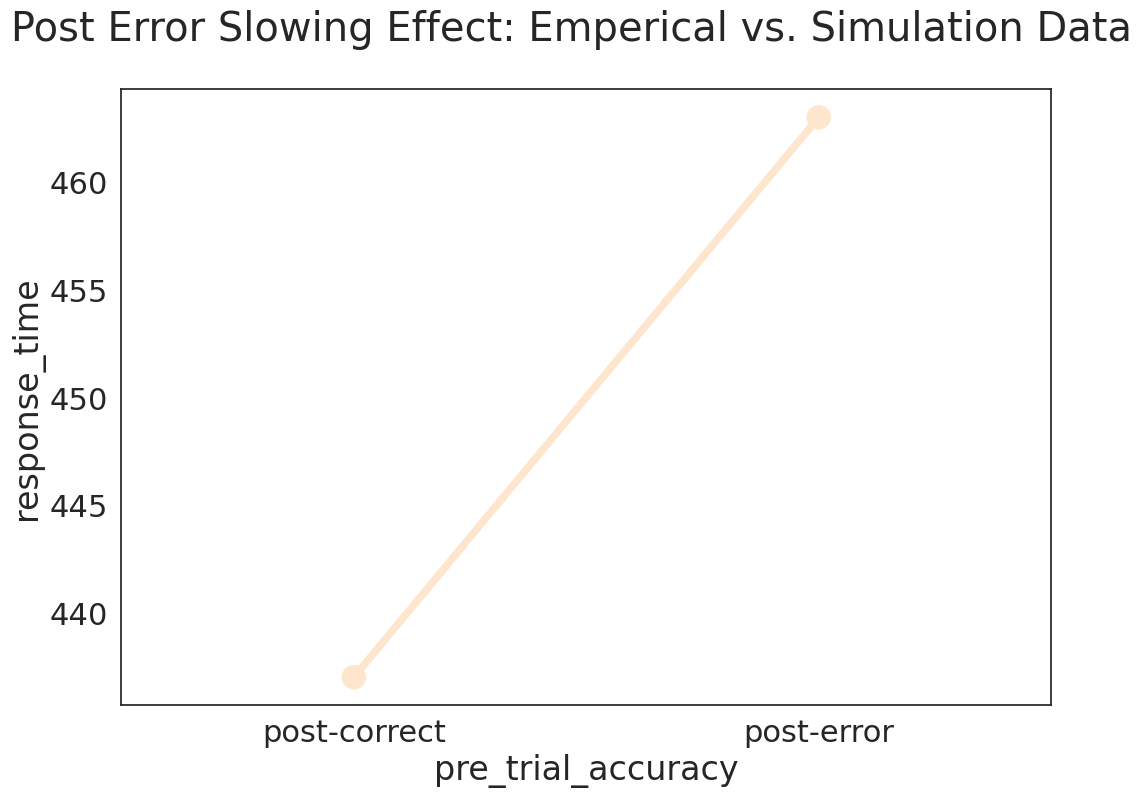

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Post Error Slowing Effect: Emperical vs. Simulation Data')
for i in range(7):
    sns.pointplot(data=df_bokesem_post[df_bokesem_post['interval']==i+1], x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color=orange_colors[i], linestyles='-', join=True, ax=ax)
    sns.pointplot(data=df_model[df_model['interval']==i+1], x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color=blue_colors[i], linestyles='--', join=True, ax=ax)
    
ax.set_ylim(400, 800)

In [ ]:
g = sns.FacetGrid(df_bokesem_post, height=5, aspect=1.8, row='interval')
g.map_dataframe(sns.pointplot, x='pre_trial_accuracy', y='response_time', order=['post-correct', 'post-error'], color='black', linestyles='-', join=True)

g.set_xlabels(label='Previous Trial Outcome', clear_inner=True)
g.set_ylabels(label='Response Time (ms)', clear_inner=True)
g.add_legend() 
g.tight_layout()
g.fig.subplots_adjust(top=0.95)  # adjust the Figure in rp
g.fig.suptitle('Post Error Slowing Effect: Emperical Data')
plt.show()

In [ ]:
df_model['interval'] = df_model['session']
g = sns.FacetGrid(df_model, height=5, aspect=1.8, row='interval')
g.map_dataframe(sns.pointplot, x='pre_trial_accuracy', y='response_time', errorbar='se', order=['post-correct', 'post-error'], color='gray', linestyles='--', join=True)

g.set_xlabels(label='Previous Trial Outcome', clear_inner=True)
g.set_ylabels(label='Response Time (ms)', clear_inner=True)
g.add_legend() 
g.tight_layout()
g.fig.subplots_adjust(top=0.95)  # adjust the Figure in rp
g.fig.suptitle('Post Error Slowing Effect: Model Data') 
plt.show()